In [38]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pickle
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from scipy.ndimage import gaussian_filter1d

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

In [39]:
#donwload lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/tEenLK693lU9v01')

# Exercise 1

I varied the values of K between 0 and 2. Over each value of K, the average performance is calculated and displayed in a plot below. As you can see it is hard to determine for which value of K the average performance is best since there are also multiple values of K for which the average performance is biggest. This can happen since the training and test data are chosen randomly. To find the dependece of the average performace on K, a gaussian filter is applied to make the average performance smooth. The result of the filter is shown in a plot below. There is a strong decrease in the average performance if the value of K is increased. Now there can be found a clear maximum value of the average performace for a single value of K. This value is the optimal value of K. At the end the plot of the linear line with the margin borders are given for the most optimal value of K. 

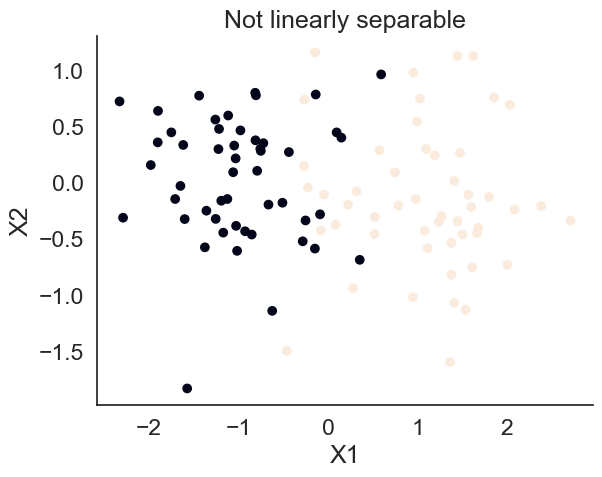

In [40]:
X_nsep,y_nsep = make_blobs(n_samples=100,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.7)
plt.scatter(X_nsep[:,0],X_nsep[:,1],c=y_nsep)
plt.title('Not linearly separable')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

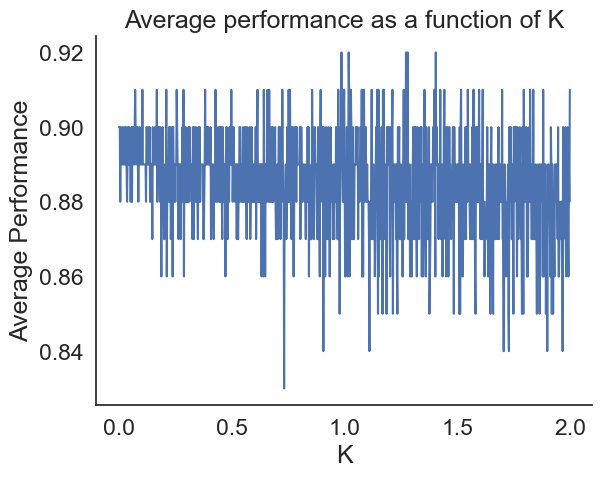

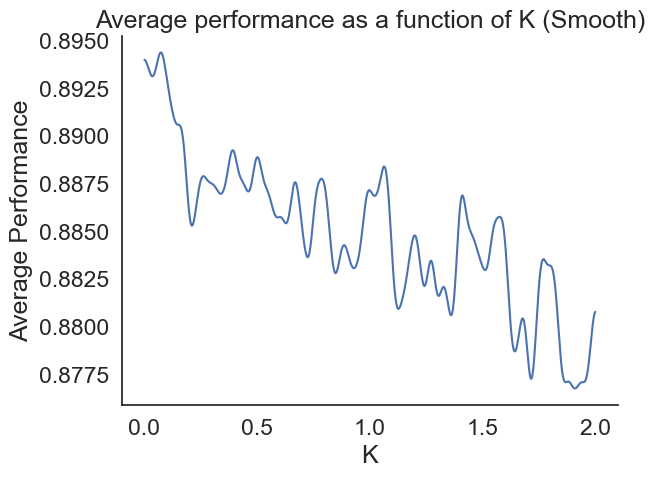

In [41]:
X,y = X_nsep,y_nsep
#K = np.outer(np.logspace(-4,1,6),np.arange(1,10,1)).flatten()
K = np.linspace(0.0001,2,1000)

X, y = X_nsep, y_nsep

accuracies = []
n_splits=5

avg_performance = []
std_performance = []

for i in range(len(K)):
    svc_model = svm.SVC(kernel='linear', C=K[i])
    kf = StratifiedKFold(n_splits=n_splits,shuffle=True)
    fold_performance = []
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model on the training data
        svc_model.fit(X_train, y_train)
        
        # Evaluate the model on the test data
        fold_performance.append(svc_model.score(X_test, y_test))

    avg_performance.append(np.mean(fold_performance))
    std_performance.append(np.std(fold_performance))

avg_performance = np.asarray(avg_performance)
std_performance = np.asarray(std_performance)


plt.plot(K, avg_performance)
plt.title('Average performance as a function of K')
plt.xlabel('K')
plt.ylabel('Average Performance')
plt.show()
avg_performance_smooth = gaussian_filter1d(avg_performance,10)
plt.plot(K, avg_performance_smooth)
plt.title('Average performance as a function of K (Smooth)')
plt.xlabel('K')
plt.ylabel('Average Performance')
plt.show()

Text(0.5, 1.0, 'Lin seperation with K=0.07216846846846847')

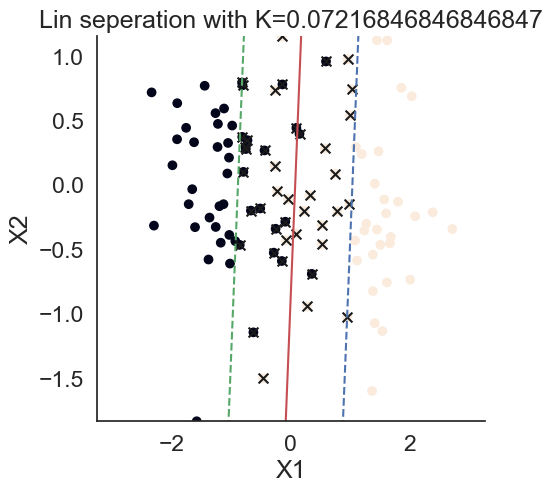

In [42]:
#For the best value of K, the average performance value has to be maximum.
#If there are mutliple values for K for which this is true, the best value is the highest. 
maxavgper = np.max(avg_performance_smooth)
for i in range(len(K)):
    if avg_performance_smooth[i] == maxavgper:
        optKvalue = K[i]
# make a plot funtion in utilities?
plt.figure(figsize=(5,5))
X,y = X_nsep,y_nsep
svc_model = svm.SVC(kernel='linear',C=optKvalue);
svc_model.fit(X, y)
plt.scatter(X[:,0],X[:,1],c=y_nsep)
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-2,2)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');
# Encircle support vectors
plt.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1], 
            s=50, 
            c='k',
            marker='x');
# Step 2 (unit-vector):
w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--')
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--')

plt.ylim([min(X[:,1]),max(X[:,1])])

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Lin seperation with K={0}'.format(optKvalue))